<a href="https://colab.research.google.com/github/VipulPhatangare/Healthy-Plant-Detection/blob/main/Plant_leaf_healthy_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
from sklearn.svm import SVC
from keras.models import Model
from keras.layers import Input, Dense
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def load_images_from_folder(folder, a,b ,img_size=(128, 128)) :
    images = []
    labels = []
    new = []
    for img_name in os.listdir(folder):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = load_img(os.path.join(folder, img_name), target_size=img_size)
            img = img_to_array(img) / 255.0
            images.append(img)
            labels.append(a)
            new.append(b)
    return np.array(images), np.array(labels), new

In [ ]:
x,y,z = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/Pepper_bell/Pepper__bell___Bacterial_spot",0,10)

In [ ]:
x1,y1,z1 = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/Pepper_bell/Pepper__bell___healthy",1,10)

In [ ]:
x2,y2,z2 = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/potato/Potato___Early_blight",0,20)

In [ ]:
x3,y3,z3 = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/potato/Potato___Late_blight",0,20)

In [ ]:
x4,y4,z4 = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/potato/Potato___healthy",1,20)

In [ ]:
x5,y5,z5 = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/Pongamia Pinnata (P7)/diseased",0,30)

In [ ]:
x6,y6,z6 = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/Pongamia Pinnata (P7)/healthy",1,30)

In [ ]:
x7,y7,z7 = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/Mango (P0)/diseased",0,40)

In [ ]:
x8,y8,z8 = load_images_from_folder("/content/drive/MyDrive/AIML/PlantVillage/Mango (P0)/healthy",1,40)

In [ ]:
x = np.concatenate((x,x1),axis = 0)
y = np.concatenate((y,y1),axis = 0)
z = np.concatenate((z,z1),axis = 0)

In [ ]:
x = np.concatenate((x,x2),axis = 0)
y = np.concatenate((y,y2),axis = 0)
z = np.concatenate((z,z2),axis = 0)

In [ ]:
x = np.concatenate((x,x3),axis = 0)
y = np.concatenate((y,y3),axis = 0)
z = np.concatenate((z,z3),axis = 0)

In [ ]:
x = np.concatenate((x,x4),axis = 0)
y = np.concatenate((y,y4),axis = 0)
z = np.concatenate((z,z4),axis = 0)

In [ ]:
x = np.concatenate((x,x5),axis = 0)
y = np.concatenate((y,y5),axis = 0)
z = np.concatenate((z,z5),axis = 0)

In [ ]:
x = np.concatenate((x,x6),axis = 0)
y = np.concatenate((y,y6),axis = 0)
z = np.concatenate((z,z6),axis = 0)

In [ ]:
x = np.concatenate((x,x7),axis = 0)
y = np.concatenate((y,y7),axis = 0)
z = np.concatenate((z,z7),axis = 0)

In [ ]:
x = np.concatenate((x,x8),axis = 0)
y = np.concatenate((y,y8),axis = 0)
z = np.concatenate((z,z8),axis = 0)

In [ ]:
x = x.reshape(x.shape[0], -1)

In [ ]:
x.shape

(5660, 49152)

In [ ]:
gg = np.transpose(x)

In [ ]:
gg.shape

(49152, 5660)

In [ ]:
import pandas as pd
di = {}
for i in range(0,49152):
  f = 'f' + str(i)
  di[f] = gg[i]

hh = pd.DataFrame(di)
hh.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f49142,f49143,f49144,f49145,f49146,f49147,f49148,f49149,f49150,f49151
0,0.443137,0.384314,0.396078,0.450980,0.392157,0.403922,0.537255,0.478431,0.490196,0.474510,...,0.623529,0.619608,0.568627,0.603922,0.650980,0.600000,0.635294,0.666667,0.615686,0.650980
1,0.494118,0.439216,0.505882,0.086275,0.043137,0.105882,0.058824,0.047059,0.090196,0.086275,...,0.815686,0.788235,0.752941,0.819608,0.776471,0.741176,0.807843,0.764706,0.729412,0.796078
2,0.639216,0.576471,0.588235,0.639216,0.576471,0.588235,0.631373,0.568627,0.580392,0.654902,...,0.666667,0.639216,0.580392,0.592157,0.662745,0.603922,0.615686,0.776471,0.717647,0.729412
3,0.772549,0.741176,0.800000,0.764706,0.733333,0.792157,0.772549,0.741176,0.800000,0.768627,...,0.505882,0.400000,0.345098,0.443137,0.682353,0.627451,0.725490,0.560784,0.505882,0.603922
4,0.603922,0.580392,0.588235,0.600000,0.588235,0.615686,0.600000,0.596078,0.650980,0.580392,...,0.647059,0.521569,0.482353,0.580392,0.901961,0.862745,0.960784,0.600000,0.560784,0.658824


In [ ]:
from sklearn.decomposition import PCA
pca =  PCA(n_components = 50)
pca.fit(hh)
df_pca = pca.transform(hh)
df_pca

array([[ 1.0867691e+01, -1.3578738e+01,  6.4814978e+00, ...,
        -2.3625965e+00,  3.1611151e-01, -3.7655549e+00],
       [ 1.8206398e+01, -1.7308544e+01,  8.3342648e+00, ...,
         2.5131860e+00,  7.8974527e-01, -7.7617264e-01],
       [ 1.2357521e+01,  3.2669353e-01,  5.6926394e-01, ...,
         5.9683740e-02,  6.9141853e-01, -1.7073586e+00],
       ...,
       [-5.0219391e+01,  2.0572882e+00, -8.3742988e-01, ...,
        -1.0696702e+00,  5.0645089e-01,  9.9860907e-01],
       [-5.2363609e+01,  5.9280968e-01, -3.3435369e+00, ...,
        -6.5701532e-01, -3.6641562e-01,  8.6799562e-01],
       [-6.1426476e+01, -1.4730163e+00, -6.6526246e-01, ...,
         3.0108333e-01,  3.7478888e-01,  1.2239773e+00]], dtype=float32)

In [ ]:
df_pca.shape

(5660, 50)

In [ ]:
df_pca = np.transpose(df_pca)

In [ ]:
df_pca.shape

(50, 5660)

In [ ]:
z.shape

(5660,)

In [ ]:
y.shape

(5660,)

In [ ]:
di1 = {}
for i in range(0,df_pca.shape[0]):
  f = 'f' + str(i)
  di1[f] = df_pca[i]

di1['z'] = z
di1['y'] = y
df = pd.DataFrame(di1)
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f42,f43,f44,f45,f46,f47,f48,f49,z,y
0,10.867691,-13.578738,6.481498,-1.345345,-10.904139,-8.722268,3.866572,-6.251225,0.817502,0.035038,...,-3.462352,-3.502057,2.356169,0.695259,3.113522,-2.362597,0.316112,-3.765555,10,0
1,18.206398,-17.308544,8.334265,0.746017,13.040570,4.796836,-3.209278,6.142052,0.774723,2.012296,...,1.842925,-3.612356,-0.966000,-1.301921,1.250977,2.513186,0.789745,-0.776173,10,0
2,12.357521,0.326694,0.569264,2.632648,-7.267100,-4.571429,-0.866962,-0.284091,-7.055950,1.645711,...,-2.532218,-0.436106,-0.579628,2.012815,3.145720,0.059684,0.691419,-1.707359,10,0
3,10.519028,7.510914,-15.886178,0.201607,3.740416,-3.550607,6.256557,-1.051385,2.384699,5.717537,...,-2.458098,0.636771,-2.758145,-4.888018,4.243210,-1.382658,1.715432,-1.079949,10,0
4,5.204453,-8.051165,9.612821,-3.294191,4.899583,5.301436,-12.525519,-10.730084,9.018595,-4.461996,...,-1.400493,-0.602648,-1.225611,0.461494,1.145203,0.778969,0.757316,0.230789,10,0


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.shape

(5660, 52)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660 entries, 0 to 5659
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      5660 non-null   float32
 1   f1      5660 non-null   float32
 2   f2      5660 non-null   float32
 3   f3      5660 non-null   float32
 4   f4      5660 non-null   float32
 5   f5      5660 non-null   float32
 6   f6      5660 non-null   float32
 7   f7      5660 non-null   float32
 8   f8      5660 non-null   float32
 9   f9      5660 non-null   float32
 10  f10     5660 non-null   float32
 11  f11     5660 non-null   float32
 12  f12     5660 non-null   float32
 13  f13     5660 non-null   float32
 14  f14     5660 non-null   float32
 15  f15     5660 non-null   float32
 16  f16     5660 non-null   float32
 17  f17     5660 non-null   float32
 18  f18     5660 non-null   float32
 19  f19     5660 non-null   float32
 20  f20     5660 non-null   float32
 21  f21     5660 non-null   float32
 22  

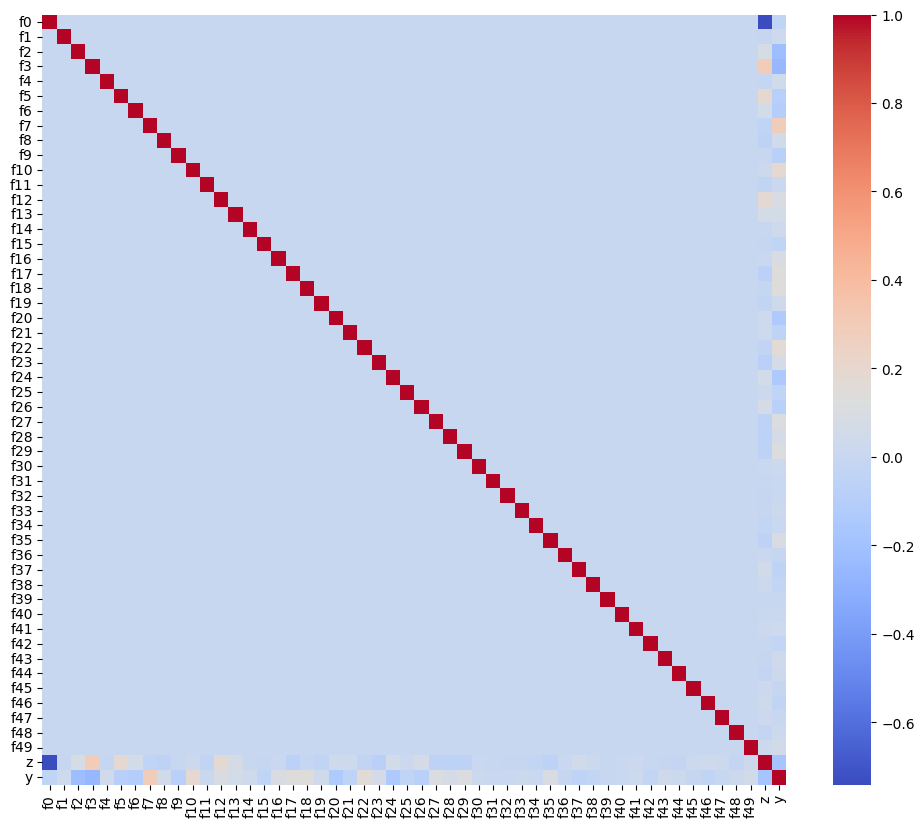

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

In [ ]:
features = df.columns[:-3]
features

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48'],
      dtype='object')

In [ ]:
df['z'].unique()

array([10, 20, 30, 40])

In [ ]:
df['i'] = df['z'].map({10 : 'Paper_bell',20 : "Potato",30 : 'Pongamia Pinnata', 40 : 'Mango'})

In [ ]:
z_feature = df.columns[-1]
z_feature

'i'

In [ ]:
output_feature = df.columns[-2]
output_feature

'y'

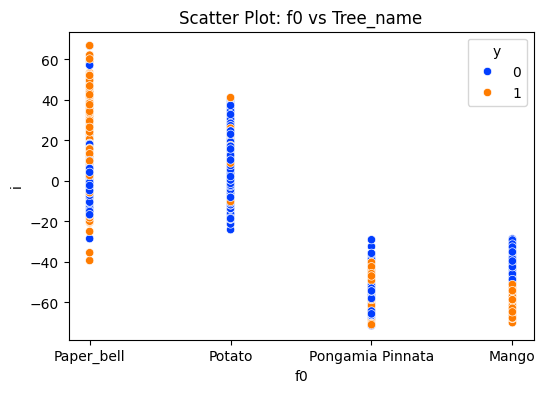

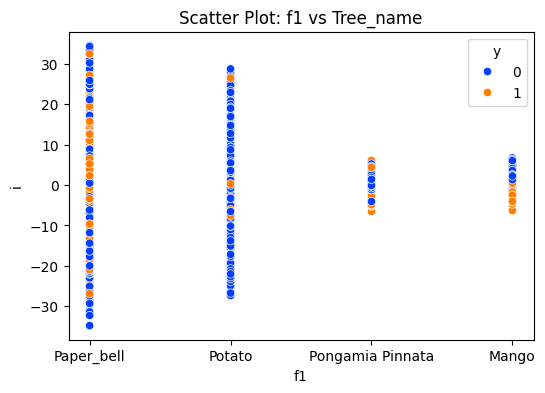

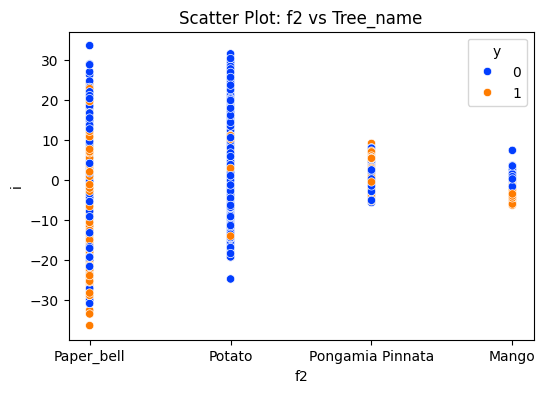

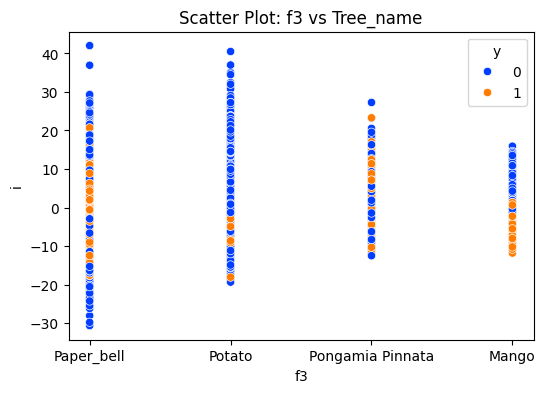

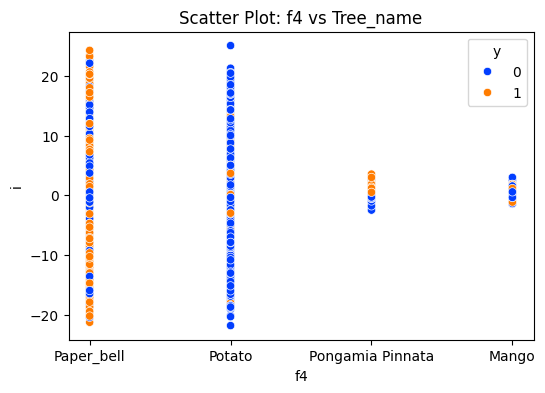

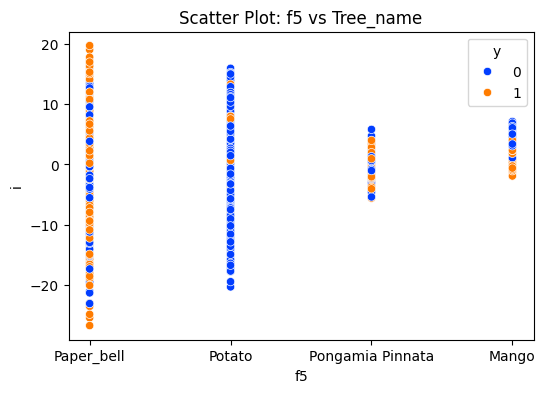

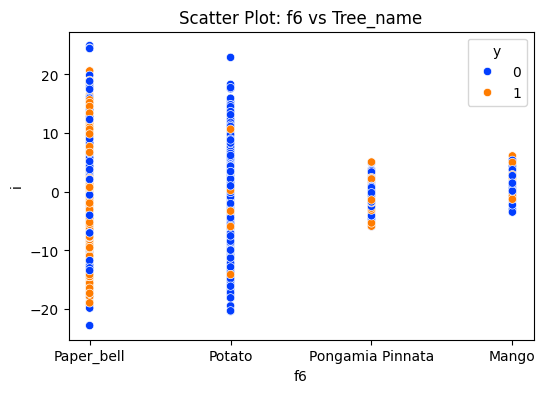

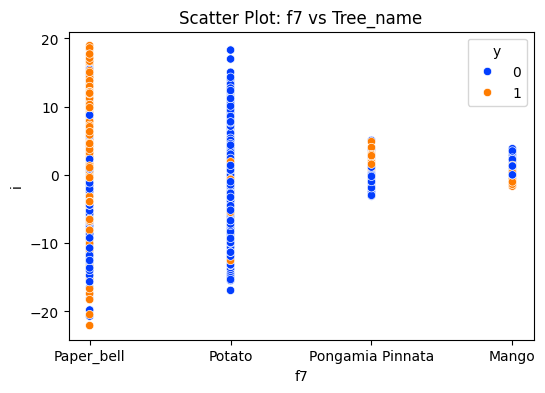

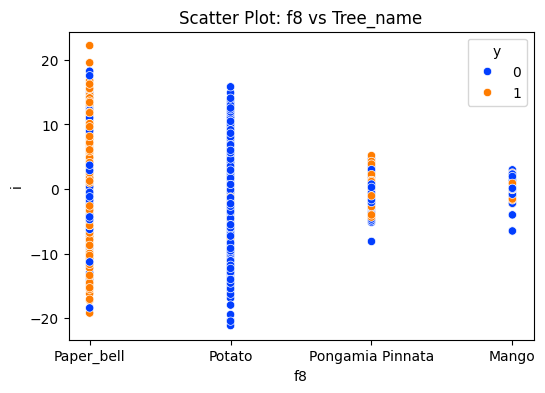

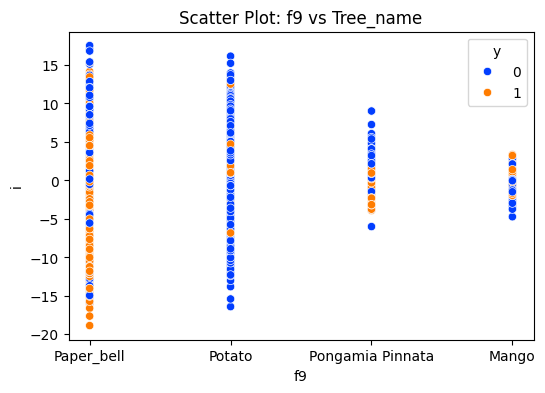

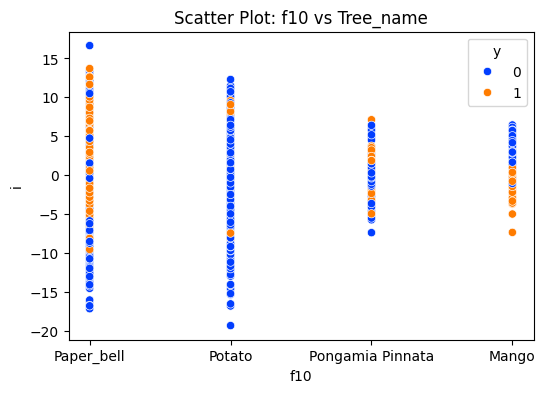

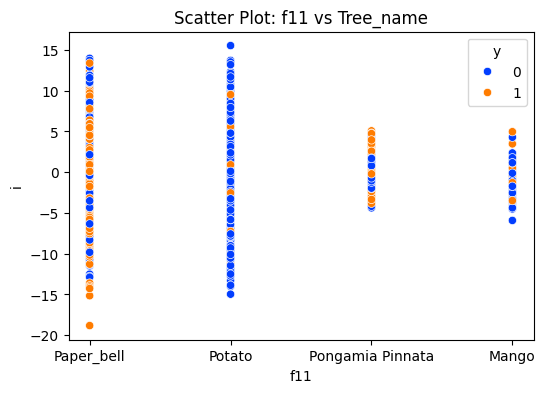

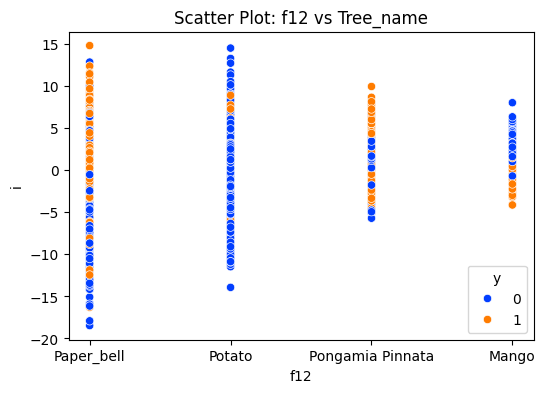

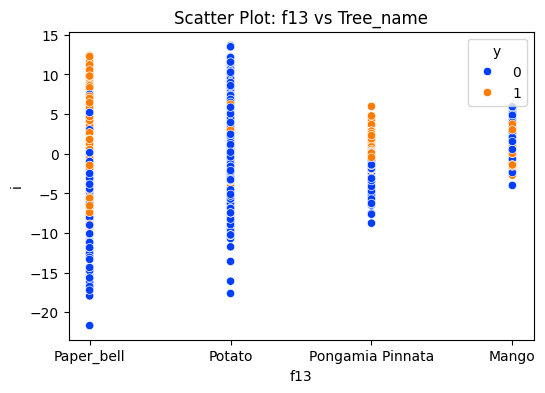

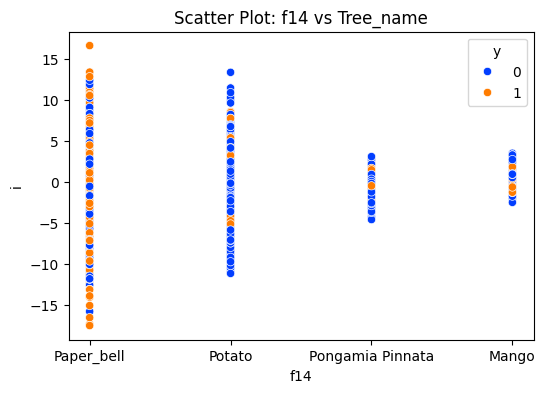

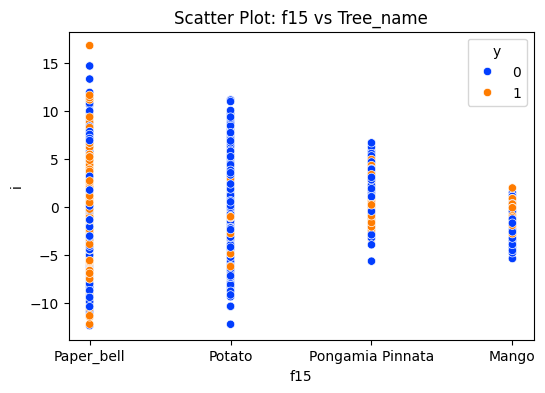

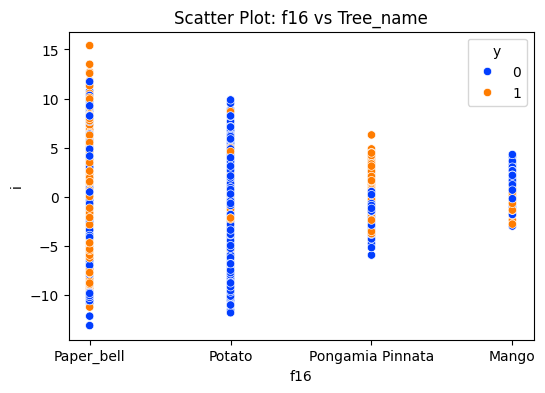

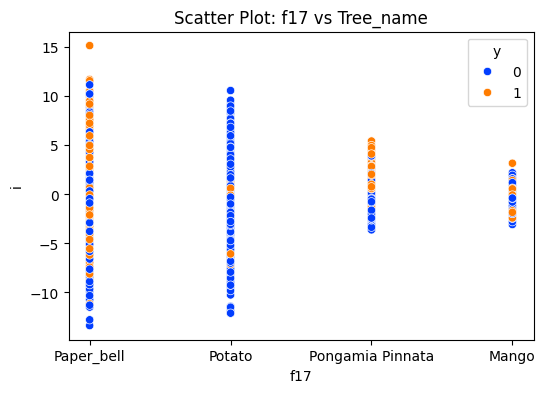

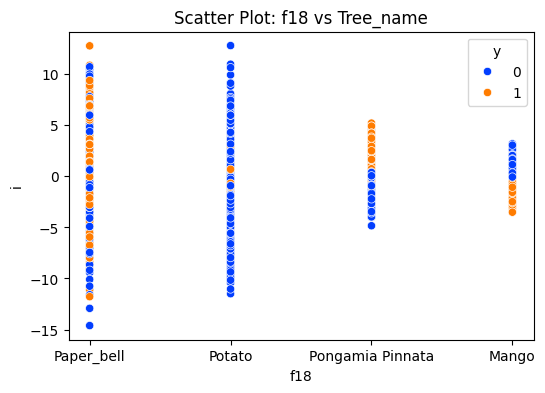

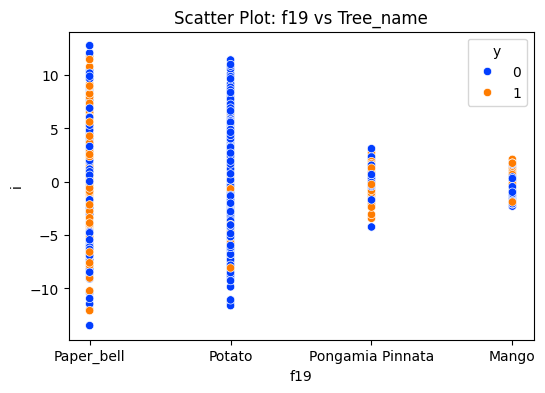

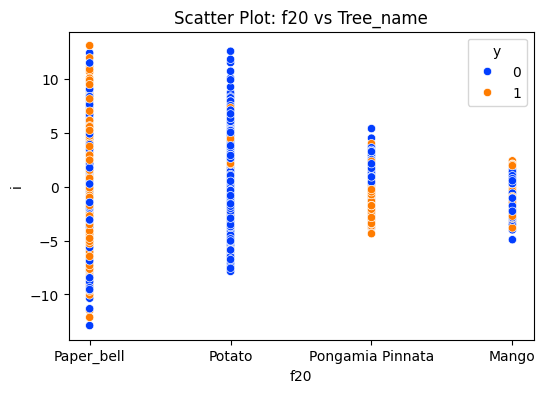

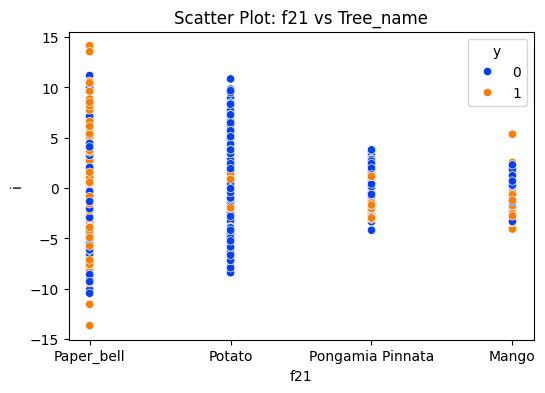

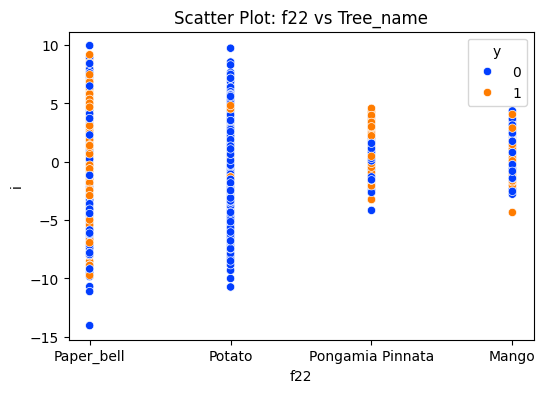

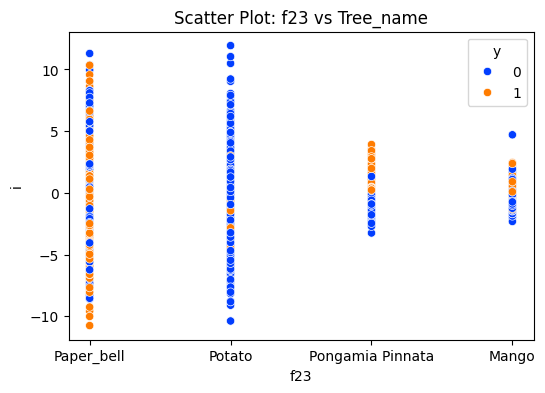

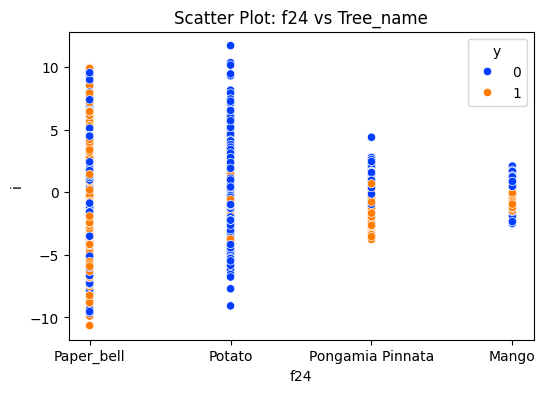

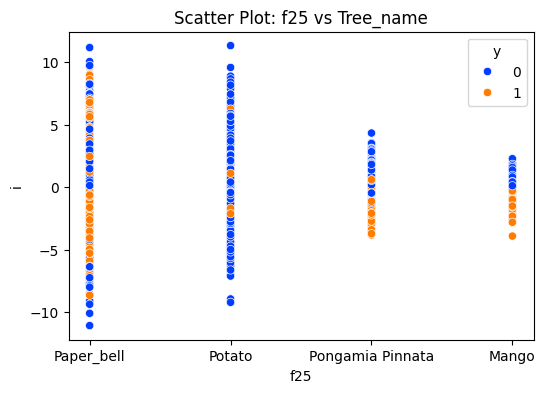

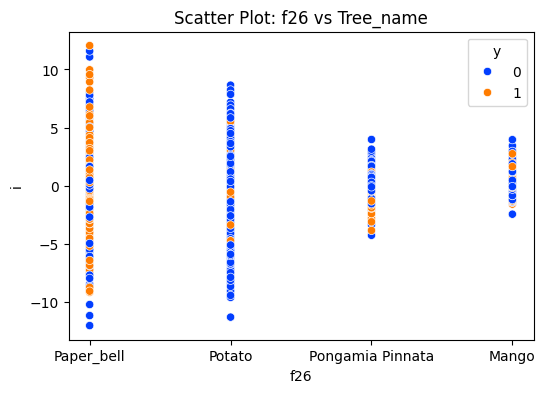

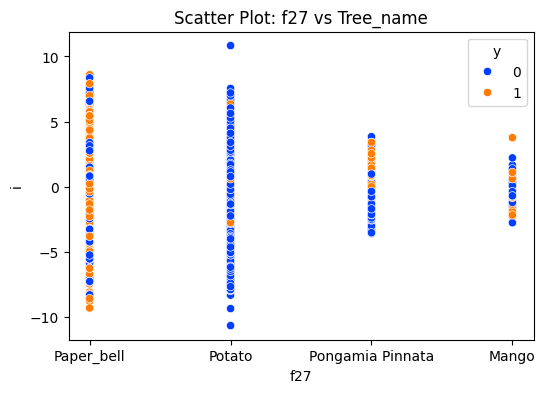

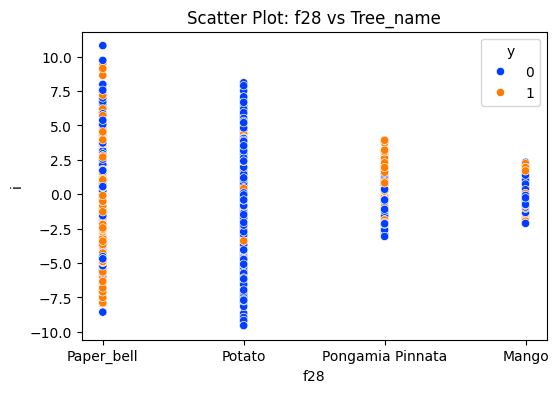

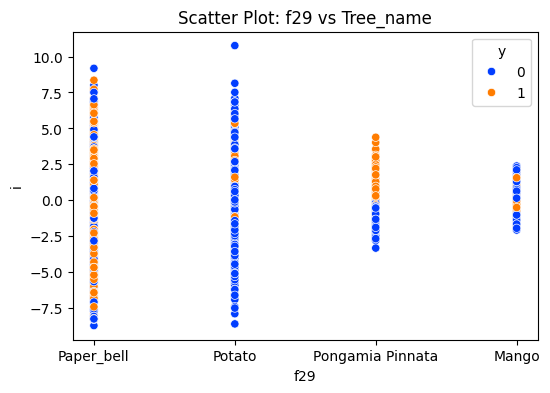

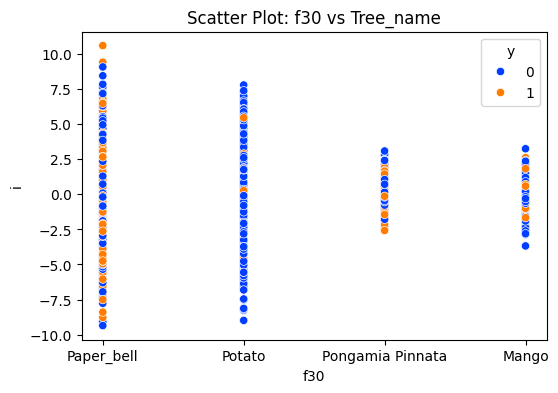

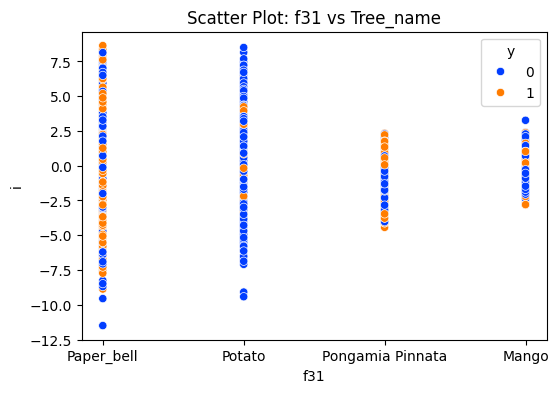

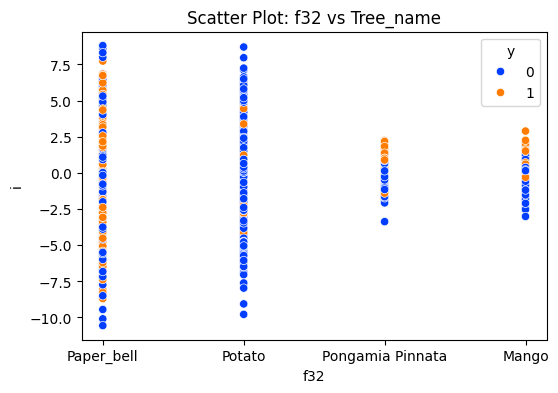

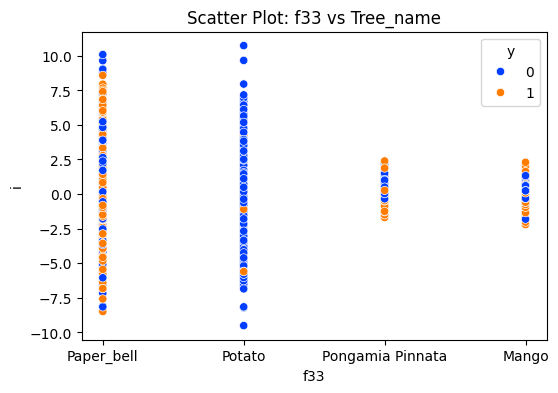

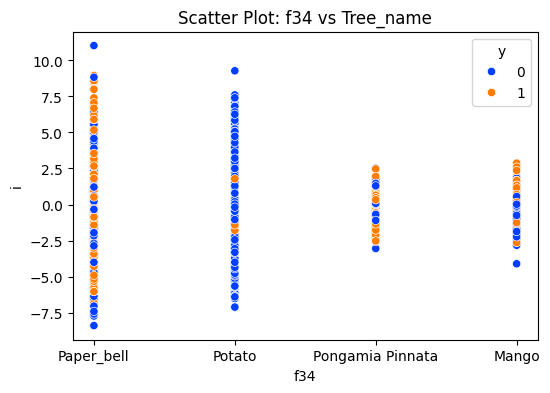

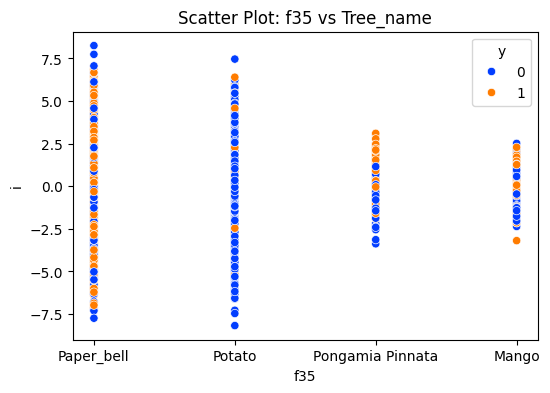

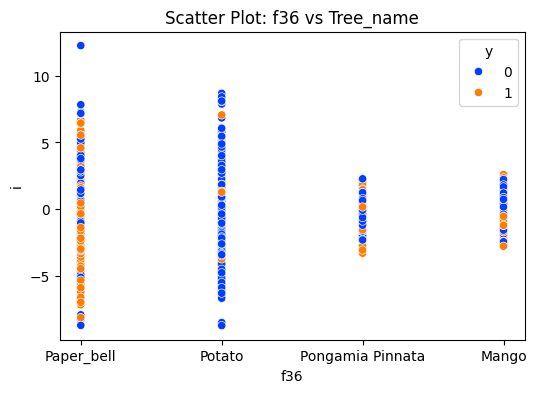

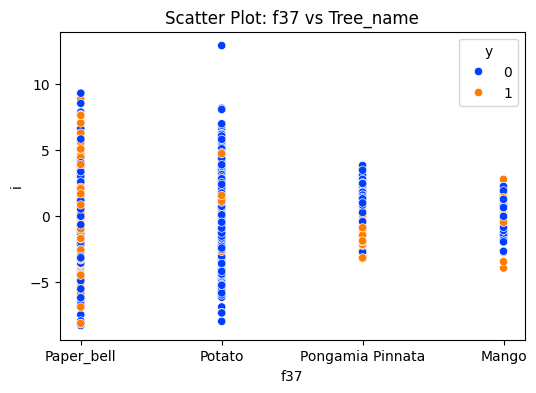

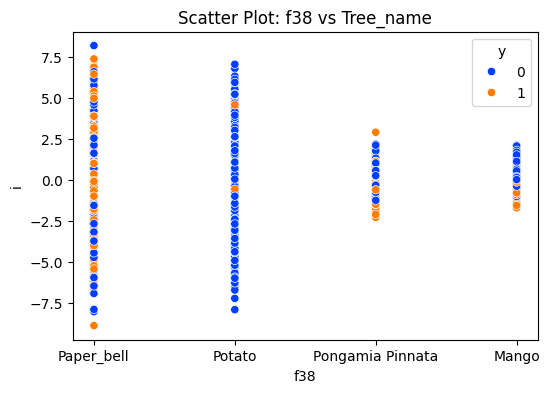

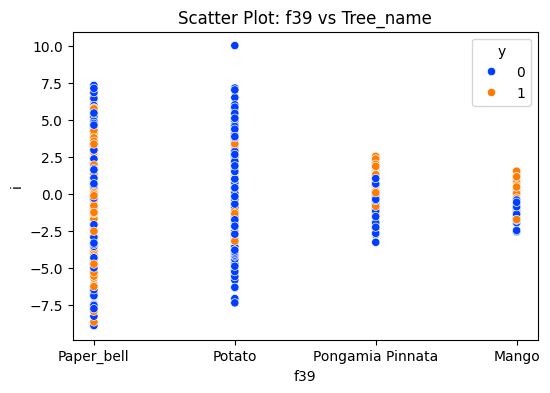

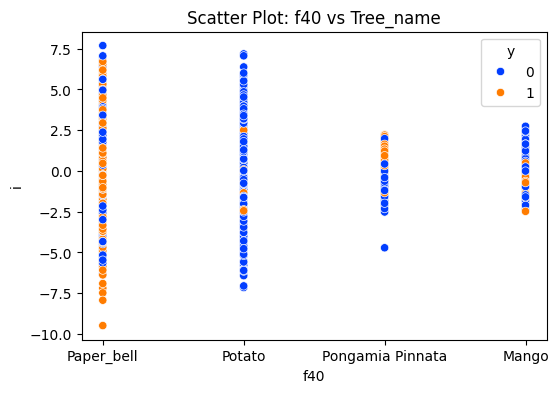

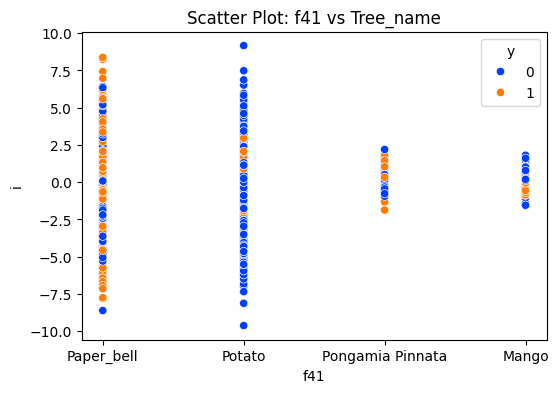

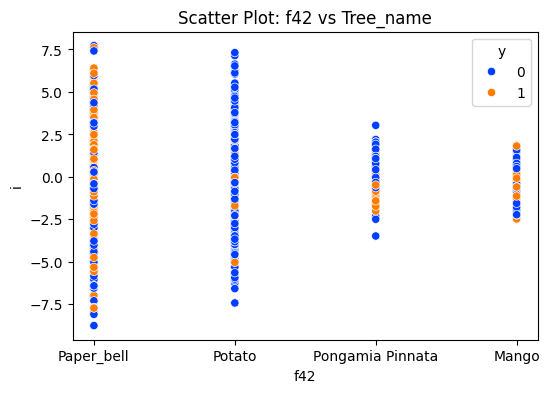

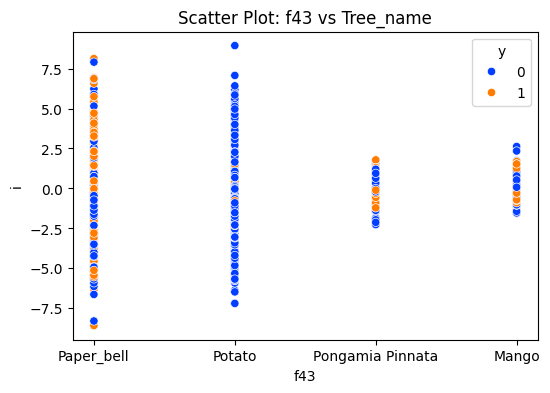

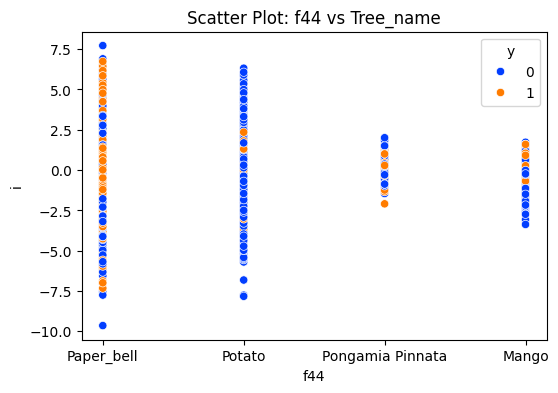

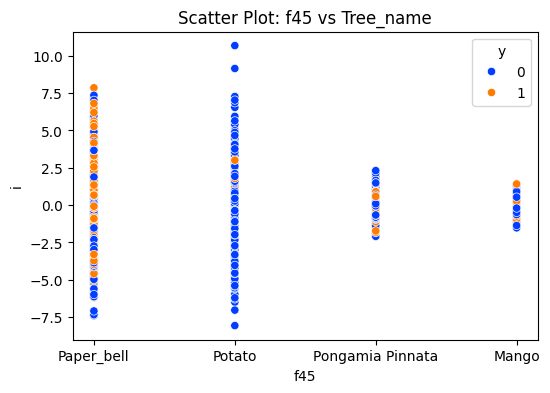

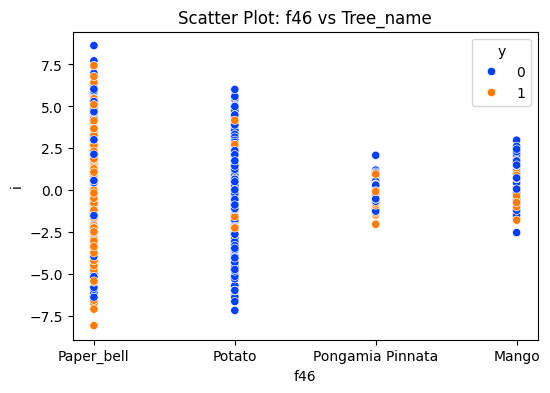

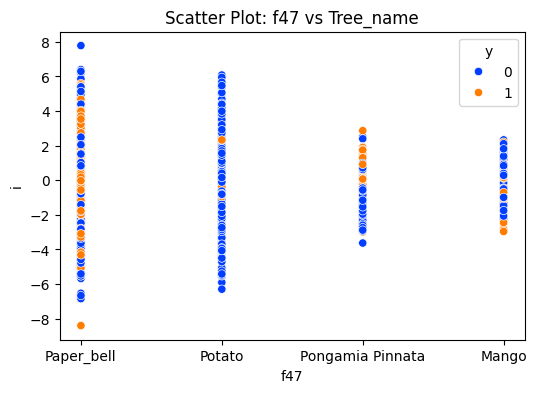

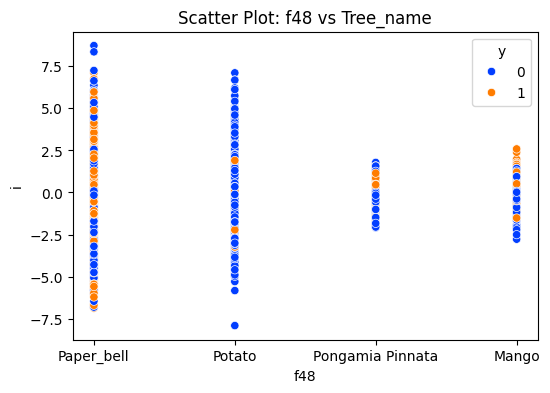

In [ ]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[z_feature], y=df[feature], hue = df[output_feature], palette = 'bright')
    plt.title(f'Scatter Plot: {feature} vs Tree_name')
    plt.xlabel(feature)
    plt.ylabel(z_feature)
    plt.show()

In [ ]:
Y = df['y']
df = df.drop(['z','i','y'], axis = 1)

In [ ]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49
0,0.203567,0.699970,0.772074,-0.388295,0.638737,-0.792673,0.127073,1.288408,0.820229,0.400025,...,1.965617,-2.914026,-0.823786,-1.626075,0.548035,-0.009117,0.993683,-1.348609,-0.969525,-0.365550
1,-0.062347,0.486825,0.274633,-0.495841,0.572562,1.101745,0.789976,0.920872,-0.141180,-0.778284,...,1.570004,-0.426775,-0.048317,-0.185183,1.127261,1.023218,-0.901988,0.238312,0.030573,-0.302320
2,-1.903310,0.211889,0.115812,0.878170,-0.042678,-0.242266,0.253581,0.091256,0.470453,-0.172775,...,0.591393,0.607650,-1.851252,-0.344326,0.122476,-0.303839,-0.286646,-0.604571,0.275550,-0.061108
3,-0.058400,-2.029122,-0.357904,-0.008063,-1.252181,-1.499485,1.120837,-0.800930,0.069679,-2.347162,...,1.966403,0.263435,0.556318,1.350570,1.023412,-0.304124,-0.562597,1.044620,-0.341030,-0.932227
4,0.799446,-0.249034,-1.558641,-1.302560,-0.212878,-0.877212,-0.689290,1.460006,-1.763909,-1.374674,...,-0.166196,0.726104,-0.435826,4.277510,-0.119101,1.234286,-0.045512,0.288420,-0.888530,1.644357


In [ ]:
X = df

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state = 30)

In [ ]:
from sklearn.svm import SVC
sv = SVC(kernel = 'rbf')
sv.fit(x_train , y_train)

SVC()

In [ ]:
sv.score(x_train,y_train) * 100

97.62746087834428

In [ ]:
sv.score(x_test,y_test) * 100

92.226148409894

In [ ]:
y_pred_sv = sv.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix , mean_squared_error
mean_squared_error(y_pred_sv,y_test)

0.07773851590106007

In [ ]:
confusion_matrix(y_pred_sv,y_test)

array([[1011,   67],
       [  65,  555]])

In [ ]:
print(classification_report(y_pred_sv,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1078
           1       0.89      0.90      0.89       620

    accuracy                           0.92      1698
   macro avg       0.92      0.92      0.92      1698
weighted avg       0.92      0.92      0.92      1698



In [ ]:
from sklearn.metrics import precision_score, recall_score , f1_score
print('precision : ' ,precision_score(y_pred_sv,y_test))
print('recall : ' ,recall_score(y_pred_sv,y_test))
print('f1 score : ' ,f1_score(y_pred_sv,y_test))

precision :  0.8922829581993569
recall :  0.8951612903225806
f1 score :  0.893719806763285


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(criterion = 'entropy',n_estimators = 200,max_depth = 6)
rc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200)

In [ ]:
rc.score(x_train,y_train)*100

90.25744573447754

In [ ]:
rc.score(x_test,y_test) * 100

85.0412249705536

In [ ]:
y_pred_rc = rc.predict(x_test)

In [ ]:
mean_squared_error(y_pred_rc,y_test)

0.14958775029446408

In [ ]:
confusion_matrix(y_pred_rc,y_test)

array([[1036,  214],
       [  40,  408]])

In [ ]:
print(classification_report(y_pred_rc,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1250
           1       0.66      0.91      0.76       448

    accuracy                           0.85      1698
   macro avg       0.81      0.87      0.83      1698
weighted avg       0.88      0.85      0.86      1698



In [ ]:
print('precision : ' ,precision_score(y_pred_rc,y_test))
print('recall : ' ,recall_score(y_pred_rc,y_test))
print('f1 score : ' ,f1_score(y_pred_rc,y_test))

precision :  0.6559485530546624
recall :  0.9107142857142857
f1 score :  0.7626168224299066


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 7)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
dtc.score(x_train,y_train) * 100

87.07723372034326

In [ ]:
dtc.score(x_test,y_test) * 100

80.85983510011778

In [ ]:
y_pred_dtc = dtc.predict(x_test)

In [ ]:
mean_squared_error(y_pred_dtc,y_test)

0.19140164899882214

In [ ]:
confusion_matrix(y_pred_dtc,y_test)

array([[890, 139],
       [186, 483]])

In [ ]:
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1029
           1       0.78      0.72      0.75       669

    accuracy                           0.81      1698
   macro avg       0.80      0.79      0.80      1698
weighted avg       0.81      0.81      0.81      1698



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.3, n_estimators = 12)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=12)

In [ ]:
gbc.score(x_train,y_train) * 100

88.44018172640081

In [ ]:
gbc.score(x_test,y_test) * 100

85.10011778563016

In [ ]:
y_pred_gbc = gbc.predict(x_test)

In [ ]:
mean_squared_error(y_pred_gbc,y_test)

0.14899882214369847

In [ ]:
confusion_matrix(y_pred_gbc,y_test)

array([[979, 156],
       [ 97, 466]])

In [ ]:
print(classification_report(y_pred_gbc,y_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1135
           1       0.75      0.83      0.79       563

    accuracy                           0.85      1698
   macro avg       0.83      0.85      0.84      1698
weighted avg       0.86      0.85      0.85      1698



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 100)
ad.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100)

In [ ]:
ad.score(x_train,y_train) * 100

87.25391216557294

In [ ]:
ad.score(x_test,y_test) * 100

85.0412249705536

In [ ]:
y_pred_ad = ad.predict(x_test)

In [ ]:
mean_squared_error(y_pred_ad,y_test)

0.14958775029446408

In [ ]:
confusion_matrix(y_pred_ad,y_test)

array([[989, 167],
       [ 87, 455]])

In [ ]:
print(classification_report(y_pred_ad,y_test))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1156
           1       0.73      0.84      0.78       542

    accuracy                           0.85      1698
   macro avg       0.83      0.85      0.83      1698
weighted avg       0.86      0.85      0.85      1698



In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators = 20, learning_rate = 0.05)
xg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xg.score(x_train,y_train) * 100

90.86320040383644

In [ ]:
xg.score(x_test,y_test) * 100

85.21790341578327

In [ ]:
y_pred_xg = xg.predict(x_test)

In [ ]:
mean_squared_error(y_pred_xg,y_test)

0.14782096584216725

In [ ]:
confusion_matrix(y_pred_xg,y_test)

array([[988, 163],
       [ 88, 459]])

In [ ]:
print(classification_report(y_pred_xg,y_test))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1151
           1       0.74      0.84      0.79       547

    accuracy                           0.85      1698
   macro avg       0.83      0.85      0.84      1698
weighted avg       0.86      0.85      0.85      1698



In [ ]:
svm_models = []
n_estimators = 5
weights = np.ones(len(y_train)) / len(y_train)
final_predictions = np.zeros(len(y_train))

for i in range(n_estimators):
    svm = SVC(probability=True, kernel='rbf', random_state=42)
    svm.fit(x_train, y_train, sample_weight = weights)
    svm_models.append(svm)
    y_pred_proba = svm.predict_proba(x_train)[:, 1]
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)
    error = np.sum(weights * (y_pred != y_train)) / np.sum(weights)
    if error == 0:
        print(f"Perfect model found at iteration {i+1}")
        break
    alpha = 0.5 * np.log((1 - error) / error)
    weights *= np.exp(-alpha * y_train * (2 * y_pred - 1))
    weights /= np.sum(weights)
    final_predictions += alpha * (2 * y_pred_proba - 1)

    print(f"Iteration {i+1}: SVM model trained with error {error:.4f} and alpha {alpha:.4f}")


final_pred_labels_train = np.where(final_predictions > 0, 1, 0)
train_accuracy = accuracy_score(y_train, final_pred_labels_train) * 100
print(f"Train Accuracy: {train_accuracy:.4f}")
final_predictions_test = np.zeros(len(x_test))

for i, model in enumerate(svm_models):
    y_pred_proba_test = model.predict_proba(x_test)[:, 1]
    final_predictions_test += alpha * (2 * y_pred_proba_test - 1)

final_pred_labels_test = np.where(final_predictions_test > 0, 1, 0)
test_accuracy = accuracy_score(y_test, final_pred_labels_test) * 100
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
mean_squared_error(y_test, final_pred_labels_test)

0.10247349823321555

In [ ]:
confusion_matrix(y_test, final_pred_labels_test)

array([[1002,   74],
       [ 100,  522]])

In [ ]:
print(classification_report(y_test, final_pred_labels_test))